# Training Linear Regression Using Various Methods


Notebook on [Google Colab](https://colab.research.google.com/drive/1yeMqI8kj7GczCeGLTOXsZCQMm6hyb9jS).

In [39]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Generating some data

$w_0 = 2$

$w_1 = 4$

$y = w_0 + w_1 \times x + $ *Gaussian noise*

In [40]:
X = 3* np.random.rand(100, 1)
y = 2 + 4 * X + np.random.randn(100, 1)

In [41]:
X[:5]

array([[0.22202589],
       [1.84249086],
       [2.70772905],
       [0.38132419],
       [0.92637012]])

In [42]:
y[:5]

array([[ 0.68623226],
       [ 9.47933605],
       [13.40115009],
       [ 2.10265128],
       [ 5.0617682 ]])

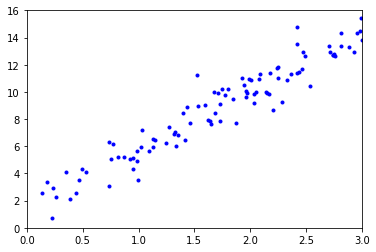

In [43]:
plt.plot(X, y, "b.")
plt.axis([0, 3, 0, 16])
plt.show()

# The Normal Equation

In [44]:
X_b = np.column_stack([np.ones((100, 1)), X])  # add x0 = 1 to each instance

In [45]:
X_b[:5]

array([[1.        , 0.22202589],
       [1.        , 1.84249086],
       [1.        , 2.70772905],
       [1.        , 0.38132419],
       [1.        , 0.92637012]])

Computing best $w_i$ values using the Normal Equation

In [46]:
w_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [47]:
w_best

array([[1.5525107 ],
       [4.25115799]])

Predicting regression output using the computed $w_i$ values

In [48]:
X_new = np.array([[1, 0], [1, 3]])

In [49]:
X_new

array([[1, 0],
       [1, 3]])

In [50]:
y_predict = X_new.dot(w_best)
y_predict

array([[ 1.5525107 ],
       [14.30598466]])

Plotting data and the regression line

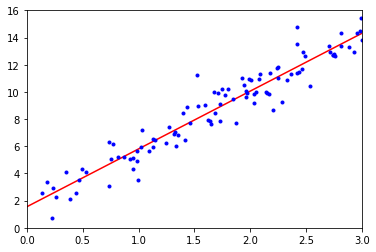

In [51]:
plt.plot([0, 3], y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 3, 0, 16])
plt.show()

## Linear Regression in sklearn

In [52]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.5525107]), array([[4.25115799]]))

### Exercises

1. Use the Normal Equation to compute linear regression for various values of $w_0$ and $w_1$.
2. Compare the results of your implementation with LinearRegression from the sklearn library.

# Batch Gradient Descent

In [53]:
learning_rate = 0.1
n_iterations = 1000
m = 100
w_best = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(w_best) - y)
    w_best = w_best - learning_rate * gradients

In [54]:
w_best

array([[1.5525107 ],
       [4.25115799]])

Plotting data and regression line

In [55]:
y_predict = X_new.dot(w_best)
y_predict

array([[ 1.5525107 ],
       [14.30598466]])

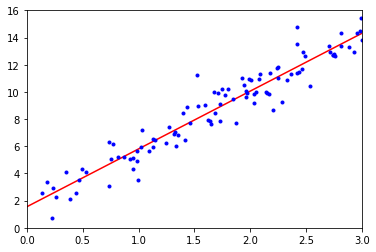

In [56]:
plt.plot([0, 3], y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 3, 0, 16])
plt.show()

Plotting training process

In [57]:
np.random.seed(7)
w_best = np.random.randn(2,1)
learning_rate = 0.05
m = len(X_b)

In [58]:
w_best

array([[ 1.6905257 ],
       [-0.46593737]])

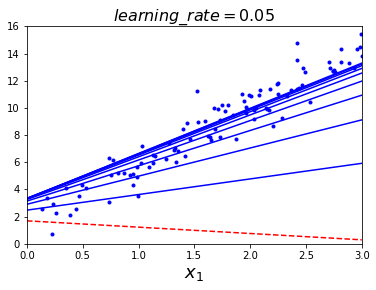

In [59]:
plt.plot(X, y, "b.")
n_iterations = 1000
for iteration in range(n_iterations):
    if iteration < 10:
        y_predict = X_new.dot(w_best)
        style = "b-" if iteration > 0 else "r--"
        plt.plot([0, 3], y_predict, style)
    gradients = 2/m * X_b.T.dot(X_b.dot(w_best) - y)
    w_best = w_best - learning_rate * gradients
plt.xlabel("$x_1$", fontsize=18)
plt.axis([0, 3, 0, 16])
plt.title(r"$learning\_rate = {}$".format(learning_rate), fontsize=16)
plt.show()

### Exercises

1. Try various learning_rate values and study how it influences convergence.
2. Try various number of iterations and study how it influences convergence.
3. Use Batch Gradient Descent to compute linear regression for various values of $w_0$ and $w_1$.

## Stochastic Gradient Descent

In [70]:
m = len(X_b)
np.random.seed(7)
n_epochs = 100
learning_rate = 0.01
t0, t1 = 5, 50  # learning schedule hyperparameters

In [71]:
def learning_schedule(t):
    return t0 / (t + t1)

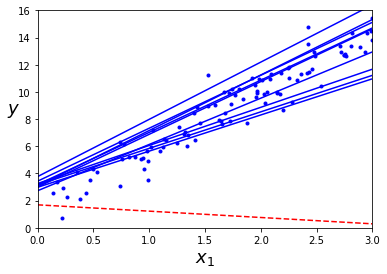

In [72]:
w_best = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 10:                    
            y_predict = X_new.dot(w_best)          
            style = "b-" if i > 0 else "r--"         
            plt.plot([0, 3], y_predict, style)       
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(w_best) - yi)
        # learning_rate = learning_schedule(epoch * m + i)
        w_best = w_best - learning_rate * gradients
             
plt.plot(X, y, "b.")                                
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)         
plt.axis([0, 3, 0, 16])                            
plt.show() 

In [63]:
w_best

array([[1.43029862],
       [4.31507312]])

## Stochastic Gradient Descent Using Sklearn

In [64]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=-inf, verbose=0,
       warm_start=False)

In [65]:
sgd_reg.intercept_, sgd_reg.coef_

(array([1.56034077]), array([4.26409903]))

## Mini-Batch Gradient Descent

In [66]:
batch_size = 20

### Exercise

1. Implement Mini-Batch Gradient Descent.